In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset=load_boston()

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 說明

* CRIM:犯罪率
* ZN:住宅用地所佔比例
* INDUS:每英畝非零售業比例
* CHAS:Charles River虛擬變量
* NOX:一氧化氮濃度
* RM:每棟住宅平均房間數
* AGE:1940年以前建造的自住單位比例
* DIS:與就業中心的加權距離
* RAD:到達逕向公路係數
* TAX:每一萬美元的不動產稅率
* PTRATIO:學生與教師比例
* B:黑人比例
* LSTAT:房東屬於低等收入階層比例

In [20]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
boston['MEDV']=boston_dataset.target

In [24]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston.drop("ZN", axis=1, inplace=True)
boston.drop("CHAS", axis=1, inplace=True)
boston.drop("NOX", axis=1, inplace=True)
boston.drop("AGE", axis=1, inplace=True)
boston.drop("DIS", axis=1, inplace=True)
boston.drop("TAX", axis=1, inplace=True)
boston.drop("PTRATIO", axis=1, inplace=True)
boston.drop("B", axis=1, inplace=True)
boston.drop("LSTAT", axis=1, inplace=True)

In [26]:
boston[:3]

,CRIM,INDUS,RM,RAD,MEDV
0,0.00632,2.31,6.575,1.0,24.0
1,0.02731,7.07,6.421,2.0,21.6
2,0.02729,7.07,7.185,2.0,34.7


In [15]:
import seaborn as sns

In [27]:
from sklearn.linear_model import LinearRegression

In [31]:
x=boston.loc[:,"CRIM":"RAD"].values #列全要,行列出從誰到誰
y=boston.MEDV

In [35]:
model=LinearRegression()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_predict=model.predict(x_test)

In [41]:
sns.set()

In [42]:
correlation_matrix=boston.corr().round(2)

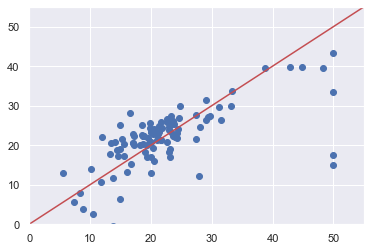

In [43]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

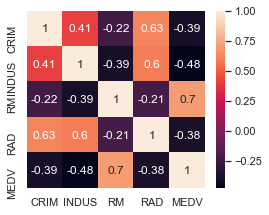

In [49]:
sns.set(rc={'figure.figsize':(4.,3.27)})
sns.heatmap(correlation_matrix,annot=True)